<a href="https://colab.research.google.com/github/amirmohammadkalateh/Mental_Health_Lifestyle/blob/main/Mental_Health_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

<bound method NDFrame.describe of         Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0        Brazil   48    Male            Low  Vegetarian          6.3   
1     Australia   31    Male       Moderate       Vegan          4.9   
2         Japan   37  Female            Low  Vegetarian          7.2   
3        Brazil   35    Male            Low       Vegan          7.2   
4       Germany   46    Male            Low    Balanced          7.3   
...         ...  ...     ...            ...         ...          ...   
2995      Japan   57  Female       Moderate    Balanced          7.0   
2996  Australia   27    Male            Low   Junk Food          7.1   
2997  Australia   42    Male       Moderate    Balanced          6.0   
2998  Australia   25    Male           High        Keto          5.7   
2999      Japan   28  Female           High       Vegan          6.9   

     Stress Level Mental Health Condition  Work Hours per Week  \
0             Low                  

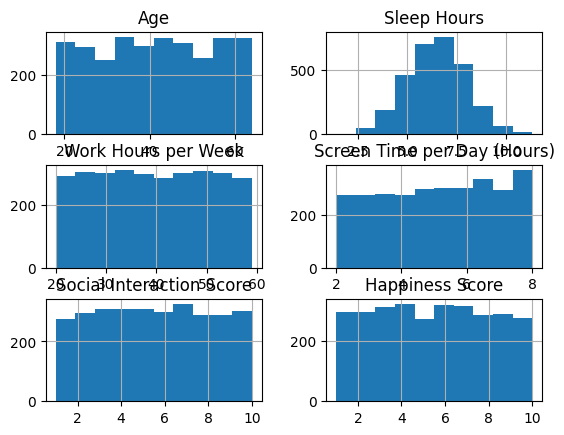

In [12]:
data = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')
print(data.describe)
print(data.hist())
print(data.head(5))

In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
data.head(10)

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,1,48,1,1,4,6.3,1,4,21,4.0,7.8,6.5
1,0,31,1,2,3,4.9,1,3,48,5.2,8.2,6.8
2,5,37,0,1,4,7.2,0,4,43,4.7,9.6,9.7
3,1,35,1,1,3,7.2,1,2,43,2.2,8.2,6.6
4,3,46,1,1,0,7.3,1,0,35,3.6,4.7,4.4
5,5,23,2,2,0,2.7,2,0,50,3.3,8.4,7.2
6,5,49,1,2,1,6.6,1,0,28,7.2,5.6,6.9
7,1,46,2,1,4,6.3,0,3,46,5.6,3.5,1.1
8,4,60,1,0,4,4.7,1,0,33,6.6,3.7,5.2
9,3,19,0,2,3,3.3,1,3,44,7.7,3.0,7.7


In [18]:
X = data.drop('Mental Health Condition', axis=1)
y = data['Mental Health Condition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Model Architecture and Implementation
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='linear')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [37]:
history = model.compile(optimizer='adam',
                        loss='mean_squared_error',
                        metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3540 - loss: 0.1703 - val_accuracy: 0.1983 - val_loss: 3.6205
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3533 - loss: 0.1434 - val_accuracy: 0.2033 - val_loss: 3.5460
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3489 - loss: 0.1325 - val_accuracy: 0.2033 - val_loss: 3.6958
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3567 - loss: 0.1374 - val_accuracy: 0.2017 - val_loss: 3.7057
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 0.1181 - val_accuracy: 0.1983 - val_loss: 3.6121
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3627 - loss: 0.1084 - val_accuracy: 0.1933 - val_loss: 3.6787
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3389 - loss: 0.1039 - val_accuracy: 0.2017 - val_loss: 3.7320
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3741 - loss: 0.1173 - val_accuracy: 0.2017 - val_loss:

# New Section

In [49]:
!pip install scikeras